In [1]:
! pip install pandas
# Knapsack NP complete could work
# or check for candidate DNSers that would be apart of the resource access and with enough resource access and DNS 
# could probably determine\


# What if determine candicate from DNSers like above but then look at their input to tor (frame size and timing 
# input and output with TDA to filter down candidates)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Get argus flows from PCAPs
!../util/process_data_argus.sh

../util/process_data_argus.sh: line 3: 537664 Segmentation fault      (core dumped) ra -r $filename.argus -c',' -s srcid rank stime ltime trans flgs seq dur runtime idle mean stddev sum min max smac dmac soui doui saddr daddr proto sport dport stos dtos sdsb ddsb sco dco sttl dttl shops dhops sipid dipid smpls dmpls autoid sas das ias cause nstroke snstroke dnstroke pkts spkts dpkts bytes sbytes dbytes appbytes sappbytes dappbytes pcr load sload dload loss sloss dloss ploss psloss pdloss retrans sretrans dretrans pretrans psretrans pdretrans sgap dgap rate srate drate dir sintpkt sintdist sintpktact sintdistact sintpktidl sintdistidl dintpkt dintdist dintpktact dintdistact dintpktidl dintdistidl sjit sjitact sjitidle djit djitact djitidle state label suser duser swin dwin svlan dvlan svid dvid svpri dvpri srng erng stcpb dtcpb tcprtt synack ackdat tcpopt inode offset smeansz dmeansz spktsz smaxsz dpktsz dmaxsz sminsz dminsz dminsz > $filename.csv
../util/process_data_argus.sh: line 3: 

ra[537917]: 16:37:03.066698 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
ra[537943]: 16:37:04.101712 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
ra[537950]: 16:37:05.115893 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
ra[537956]: 16:37:06.126344 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
ra[537962]: 16:37:07.134323 ArgusGenerateRecordStruct: post ARGUS_DATA_DSR len is zero
ra[537968]: 16:37:08.145703 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
ra[537974]: 16:37:09.157114 ArgusGenerateRecordStruct: pre ARGUS_DATA_DSR len is zero
../util/process_data_argus.sh: line 3: 537987 Segmentation fault      (core dumped) ra -r $filename.argus -c',' -s srcid rank stime ltime trans flgs seq dur runtime idle mean stddev sum min max smac dmac soui doui saddr daddr proto sport dport stos dtos sdsb ddsb sco dco sttl dttl shops dhops sipid dipid smpls dmpls autoid sas das ias cause nstroke snstroke dnstroke pkts spkts dpkts bytes sbyte

In [3]:
# PCAP to CSV
!../util/pcap_to_csv.sh

mkdir: cannot create directory ‘data/csv’: File exists


In [4]:
# PCAPNG to CSV
!../util/pcapng_to_csv.sh

mkdir: cannot create directory ‘data/csv’: File exists


In [5]:
from os import listdir
from os.path import isfile, join

def getFilenames(path):
    return [path+f for f in listdir(path) if isfile(join(path, f))]

In [6]:
# Get argus data
arguspath = "data/argus/csv/"
argusCSVs = getFilenames(arguspath)

# Get pcap data
pcappath = "data/csv/"
pcapCSVs = getFilenames(pcappath)
data = argusCSVs + pcapCSVs

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv (pcapCSVs[0])
df

,frame.number,frame.time,ip.src,ip.dst,ip.proto,frame.len,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,...,dtls.handshake.extensions_alpn_str,dtls.handshake.extensions_alpn_str_len,dtls.handshake.extensions_key_share_client_length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,tcp.payload
0,1,"Dec 31, 1969 19:04:01.000000000 EST",102.0.0.16,100.0.0.1,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
1,2,"Dec 31, 1969 19:04:01.100000000 EST",100.0.0.1,102.0.0.16,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,0.100000,0.100000,NaN
2,3,"Dec 31, 1969 19:04:01.100000000 EST",102.0.0.16,100.0.0.1,6,557,557,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.100000,0.000000,0.100000,0.000000,1603010200010001fc03032e9a3f4daa7518e402aff487...
3,4,"Dec 31, 1969 19:04:01.200000000 EST",100.0.0.1,102.0.0.16,6,1210,1210,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.200000,0.100000,0.200000,0.100000,160303009b02000097030365c3e74135a68e5c7e66c35c...
4,5,"Dec 31, 1969 19:04:01.200000000 EST",102.0.0.16,100.0.0.1,6,120,120,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.200000,0.000000,0.200000,0.000000,14030300010117030300458c4bf27981613c6ae7378285...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,4447,"Dec 31, 1969 19:59:52.877777000 EST",102.0.0.16,46.59.65.88,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,3351.877777,0.001000,3351.146777,0.001000,NaN
4447,4448,"Dec 31, 1969 19:59:54.195777000 EST",102.0.0.16,51.15.54.117,6,576,576,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,3353.195777,1.318000,3351.195777,5.482501,170303021390e014973e48c32f293d44268568ba2db646...
4448,4449,"Dec 31, 1969 19:59:54.295777000 EST",51.15.54.117,102.0.0.16,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,3353.295777,0.100000,3351.295777,0.100000,NaN
4449,4450,"Dec 31, 1969 20:00:00.000000000 EST",102.0.0.16,46.59.65.88,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,3359.000000,5.704223,3358.269000,7.122223,NaN


In [9]:
len(data)

84

In [10]:
len(argusCSVs)

42

In [11]:
# Basic Scopes
import re

# Get all clients and ISP dns scope
r = re.compile(".*isp.csv|.*Client[0-9]*-(?!127\.0\.0\.1)[0-9]*.[0-9]*.[0-9]*.[0-9]*..csv")
ISP_scope = list(filter(r.match, data))

# Access to public resolver scope
r = re.compile(".*isp.csv")
Access_resolver = list(filter(r.match, data))

# DNS Scope
r = re.compile("(.*tld|.*root-server|.*sld).csv")
Access_to_auth_zone = list(filter(r.match, data))

# Access Tor Scope
r = re.compile(".*Client[0-9]*-(?!127\.0\.0\.1)[0-9]*.[0-9]*.[0-9]*.[0-9]*..csv")
Access_tor = list(filter(r.match, data))

# Server Public Scope
r = re.compile(".*myMarkovServer[0-9]*-(?!127\.0\.0\.1)[0-9]*\.[0-9]*\.[0-9]*\.[0-9]*.csv")
Server_scope = list(filter(r.match, data))

# tor Exit scope
r = re.compile(".*exit.*")
Tor_exit_Scope = list(filter(r.match, data))

# tor Guard scope
r = re.compile(".*guard.*")
Tor_guard_Scope = list(filter(r.match, data))

# tor Relay scope
r = re.compile(".*relay.*")
Tor_relay_Scope = list(filter(r.match, data))

# tor Middle scope
r = re.compile(".*middle.*")
Tor_middle_Scope = list(filter(r.match, data))

# tor 4uthority scope
r = re.compile(".*4uthority.*")
Tor_4uthority_Scope = list(filter(r.match, data))

# resolver scope
r = re.compile(".*resolver.*")
resolver_Scope = list(filter(r.match, data))

In [12]:
def pcap_only(lis):
    r = re.compile(".*data/csv.*")
    return list(filter(r.match, lis))

def format_time_col(df, time_col):
    time_format='%b %d, %Y %X.%f'
    df[time_col] = df[time_col].apply(lambda x: datetime.strptime(x[:-7], time_format))
    df.set_index(time_col)
    return df

def scope_to_df(scope):
    df = pd.DataFrame()
    for f in scope:
        ddf = pd.read_csv (f)
        df = pd.concat([df, ddf])
    return df

In [13]:
from datetime import datetime

def df_to_ts(df):
    df['count'] = 1
    return df.set_index('frame.time').resample('T').sum().dropna().reset_index()

In [14]:
# get start time for GNS3
GNS3_data = format_time_col(scope_to_df(pcap_only(Access_resolver + Access_to_auth_zone)), 'frame.time')
GNS3_starttime = GNS3_data.head(1)['frame.time'].tolist()[0]
Shadow_starttime = datetime.strptime('Dec 31, 1969 19:30:00', '%b %d, %Y %X')
Shadow_offset = GNS3_starttime - Shadow_starttime
Shadow_offset

Timedelta('19328 days 20:14:17.180286')

In [15]:
dns_df = format_time_col(scope_to_df(pcap_only(Access_to_auth_zone)), 'frame.time')

In [16]:
# Steps
# Who do this
# Cluster of who this
# Cluster per scope? all scopes?
# Link Clusters

In [17]:
# Assume range is whole experiment
# Justification: Looking for first group and all groups at same time (30 minute range, In future should have comms
# going on that start before we are looking [noise])

In [90]:
# Cluster DNS
## Create ts for each IP
resolv_df = format_time_col(scope_to_df(pcap_only(resolver_Scope)), 'frame.time')
DNS_PROTO = 17.0
resolv_df_filtered = resolv_df[resolv_df['ip.proto'] == DNS_PROTO]
IPs = resolv_df_filtered['ip.src'].unique()
flows_ip = {}
flows_ts_ip = {}
resolver_ip = '172.17.0.10'
for ip in IPs:
    if ip != resolver_ip:
        flows_ip[ip] = resolv_df_filtered[(resolv_df_filtered['ip.dst'] == ip) | (resolv_df_filtered['ip.src'] == ip)]
        flows_ts_ip[ip] = df_to_ts(flows_ip[ip].copy()).set_index('frame.time')

In [91]:
flows_ts_ip

{'102.0.0.13':                      frame.number  ip.proto  frame.len  count
 frame.time                                                   
 2022-12-02 15:45:00           319     102.0        507      6
 2022-12-02 15:46:00             0       0.0          0      0
 2022-12-02 15:47:00           546      68.0        355      4
 2022-12-02 15:48:00             0       0.0          0      0
 2022-12-02 15:49:00           802      68.0        355      4
 2022-12-02 15:50:00           958      68.0        355      4
 2022-12-02 15:51:00             0       0.0          0      0
 2022-12-02 15:52:00          1246      68.0        355      4
 2022-12-02 15:53:00          1386      68.0        355      4
 2022-12-02 15:54:00             0       0.0          0      0
 2022-12-02 15:55:00          1622      68.0        355      4
 2022-12-02 15:56:00          1814      68.0        355      4
 2022-12-02 15:57:00          1926      68.0        355      4
 2022-12-02 15:58:00             0       

In [92]:
## Viz
# importing Libraries
  
# import pandas as pd
import pandas as pd
  
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

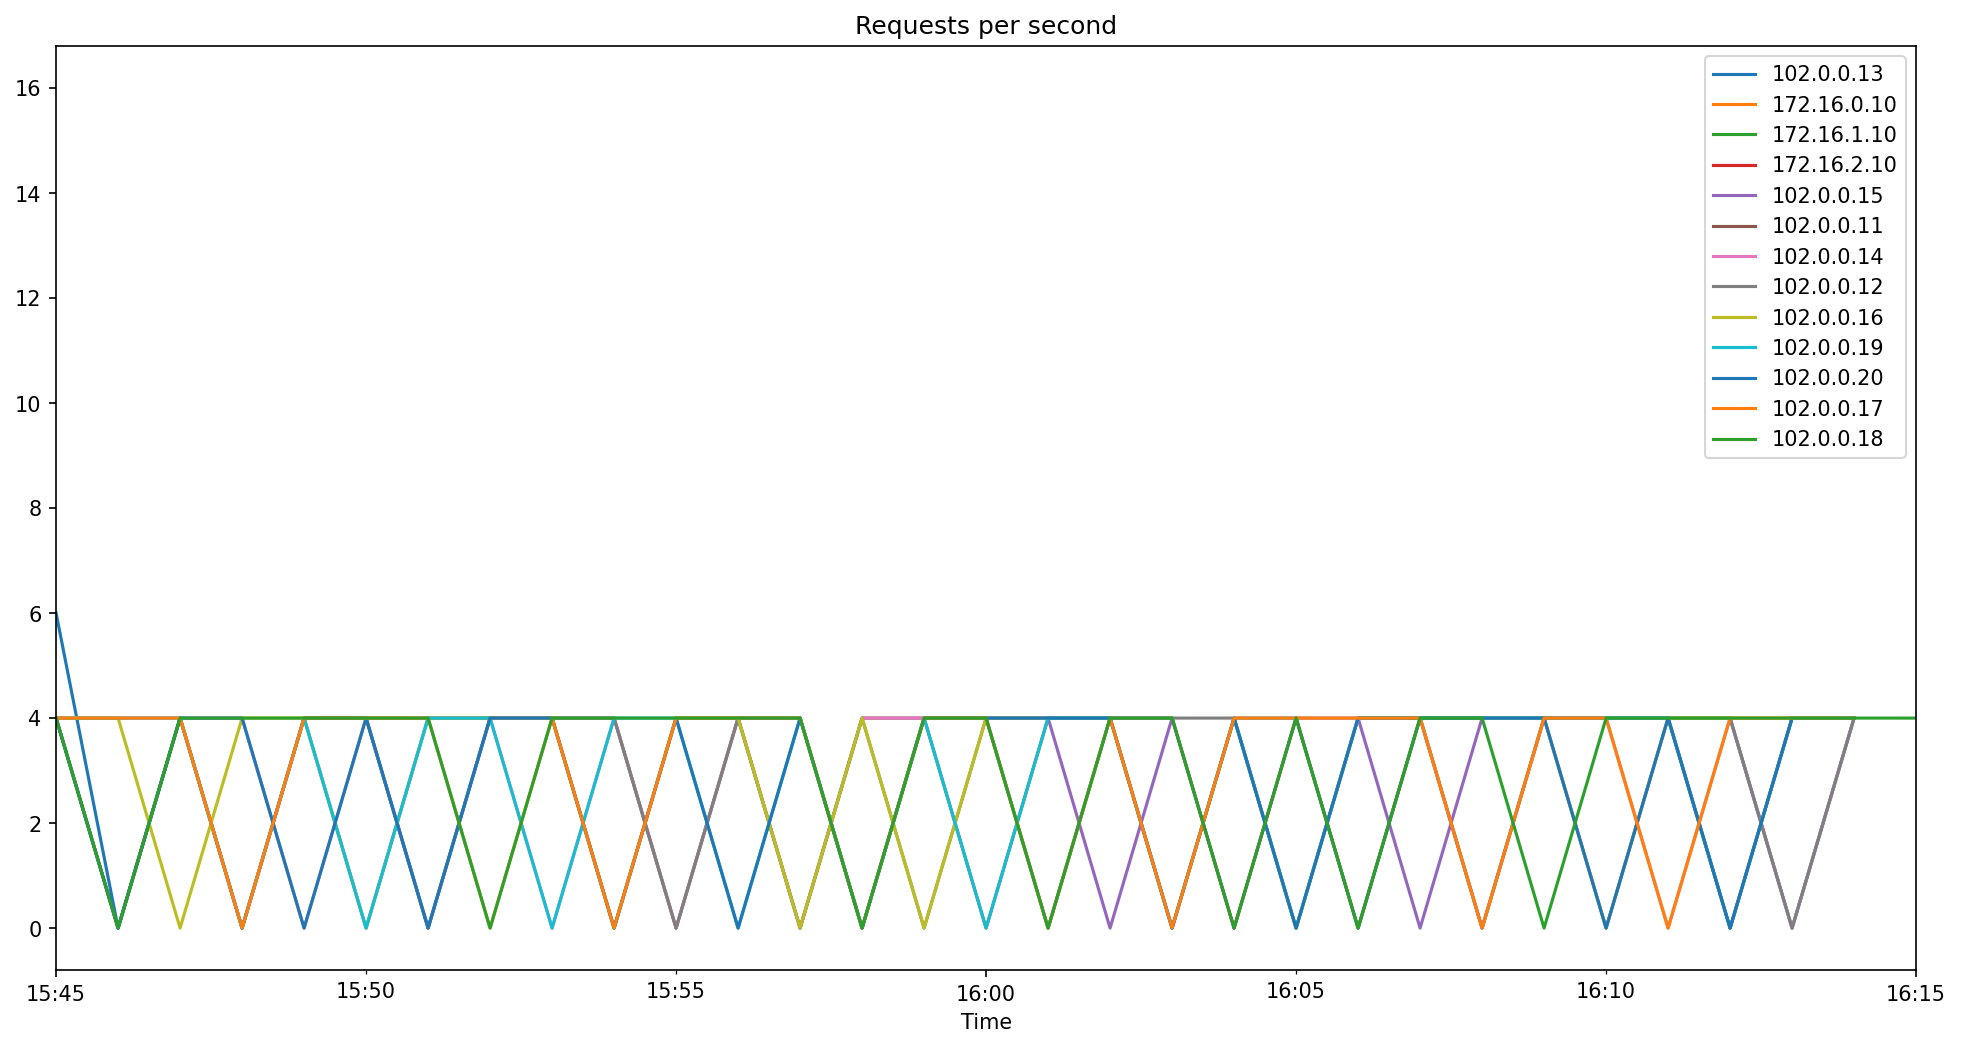

In [93]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for f in flows_ts_ip:
    flows_ts_ip[f]['count'].plot(label=f)
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
  
# adding legend to the curve
plt.legend()

In [94]:
import numpy as np
def generate_features(df, flow):
    features = []
    # 'first_seen'
    features += [float(df['frame.time'].min().timestamp())]
    # 'last_seen'
    features += [float(df['frame.time'].max().timestamp())]
    # 'reqs_per_sec'
    features += [flow['count'].mean()]
    # 'reqs_per_sec_std'
    val = flow['count'].std()
    features += [0 if np.isnan(val) else val]
    # 'total_req'
    features += [len(df)]
    # 'reqs_max'
    features += [flow['count'].max()]
    # 'reqs_min'
    features += [flow['count'].min()]
    return [features]
## Get flow features
cols = ['first_seen','last_seen', 'reqs_per_sec', 'reqs_per_sec_std', 'total_req', 'reqs_max', 'reqs_min']
index = []
feature_data = []
for ip in flows_ip:
    index += [ip]
    feature_data += generate_features(flows_ip[ip], flows_ts_ip[ip])

  
# Create the pandas DataFrame
df_ = pd.DataFrame(feature_data, columns=cols, index=index)
df

,first_seen,last_seen,reqs_per_sec,reqs_per_sec_std,total_req,reqs_max,reqs_min
102.0.0.13,1.669996e+09,1.669998e+09,2.866667,1.942862,86,6,0
172.16.0.10,1.669996e+09,1.669996e+09,16.000000,0.000000,16,16,16
172.16.1.10,1.669996e+09,1.669996e+09,14.000000,0.000000,14,14,14
172.16.2.10,1.669996e+09,1.669996e+09,4.000000,0.000000,4,4,4
102.0.0.15,1.669996e+09,1.669998e+09,2.620690,1.934901,76,4,0
102.0.0.11,1.669996e+09,1.669998e+09,2.896552,1.819435,84,4,0
102.0.0.14,1.669996e+09,1.669998e+09,2.533333,1.960530,76,4,0
102.0.0.12,1.669996e+09,1.669998e+09,2.666667,1.917853,80,4,0
102.0.0.16,1.669996e+09,1.669998e+09,2.896552,1.819435,84,4,0
102.0.0.19,1.669996e+09,1.669998e+09,2.800000,1.864366,84,4,0


In [95]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,first_seen,last_seen,reqs_per_sec,reqs_per_sec_std,total_req,reqs_max,reqs_min
102.0.0.13,0.000000,0.991672,0.024752,0.990988,0.891304,0.166667,0.000
172.16.0.10,0.000036,0.000000,1.000000,0.000000,0.130435,1.000000,1.000
172.16.1.10,0.009015,0.000069,0.851485,0.000000,0.108696,0.833333,0.875
172.16.2.10,0.013771,0.000999,0.108911,0.000000,0.000000,0.000000,0.250
102.0.0.15,0.098089,0.956264,0.006487,0.986928,0.782609,0.000000,0.000
102.0.0.11,0.099137,0.955672,0.026972,0.928032,0.869565,0.000000,0.000
102.0.0.14,0.124730,0.989965,0.000000,1.000000,0.782609,0.000000,0.000
102.0.0.12,0.172739,0.990540,0.009901,0.978232,0.826087,0.000000,0.000
102.0.0.16,0.503956,0.960269,0.026972,0.928032,0.869565,0.000000,0.000
102.0.0.19,0.519665,0.994497,0.019802,0.950950,0.869565,0.000000,0.000


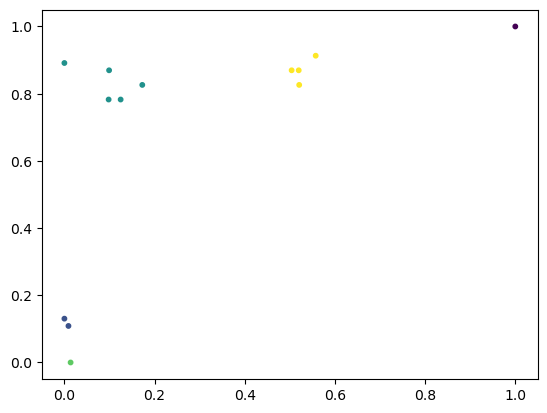

In [96]:
from sklearn.cluster import KMeans
import numpy as np# k means
kmeans = KMeans(n_clusters=5, random_state=0)
normalized_df['cluster'] = kmeans.fit_predict(normalized_df)# get centroids

plt.scatter(normalized_df.first_seen, normalized_df.total_req, c=normalized_df.cluster, alpha = 1, s=10)

In [97]:
# Cluster and viz dns
!pip install umap-learn
# Dimension reduction and clustering libraries
import umap.umap_ as umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

Defaulting to user installation because normal site-packages is not writeable


/home/taylor/.local/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


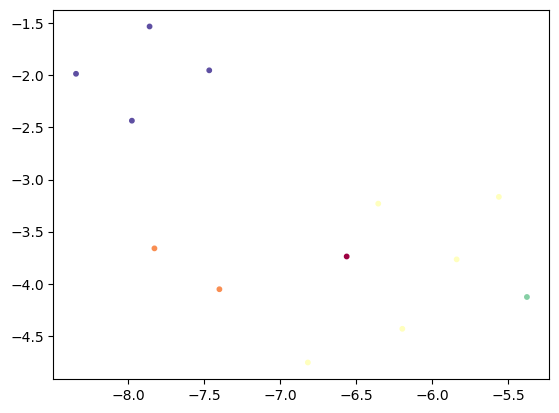

In [98]:
#normalized_df=(df-df.min())/(df.max()-df.min())
standard_embedding = umap.UMAP(random_state=42).fit_transform(normalized_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=normalized_df.cluster, s=10, cmap='Spectral');

In [99]:
# Cluster who this
Server_scope

['data/argus/csv/myMarkovServer0-101.0.0.10.csv',
 'data/csv/myMarkovServer0-101.0.0.10.csv']

In [29]:
def hex_col_to_str(df, col):
    df[col + "_str"] = df[col].apply(lambda x: bytearray.fromhex(x).decode("utf-8"))

In [100]:
# Cluster Server resources
## Create ts for each resource
resource_df = format_time_col(scope_to_df(pcap_only(Server_scope)), 'frame.time')
resource_df['frame.time'] = resource_df['frame.time'].apply(lambda x: x+Shadow_offset)
resource_df_filtered = resource_df[(resource_df['http.request'].notna())]
hex_col_to_str(resource_df_filtered, 'tcp.payload')
resource_df_filtered['resource'] = resource_df_filtered['tcp.payload_str'].apply(lambda x: x.split(' ')[1])
resource_df_filtered

/tmp/ipykernel_537605/2636449078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "_str"] = df[col].apply(lambda x: bytearray.fromhex(x).decode("utf-8"))
/tmp/ipykernel_537605/4127982458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_df_filtered['resource'] = resource_df_filtered['tcp.payload_str'].apply(lambda x: x.split(' ')[1])


,frame.number,frame.time,ip.src,ip.dst,ip.proto,frame.len,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,...,dtls.handshake.extensions_key_share_client_length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,tcp.payload,tcp.payload_str,resource
22,23,2022-12-02 15:44:17.539159,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,0.240582,0.104358,0.240582,0.139582,474554202f7265736f7572636531302e68746d6c204854...,GET /resource10.html HTTP/1.1\r\nHost: 101.0.0...,/resource10.html
25,26,2022-12-02 15:44:17.545492,5.2.72.101,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,0.246915,0.006333,0.246804,0.145804,474554202f7265736f7572636531302e68746d6c204854...,GET /resource10.html HTTP/1.1\r\nHost: 101.0.0...,/resource10.html
28,29,2022-12-02 15:44:17.547956,5.2.72.101,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,0.249379,0.002464,0.247780,0.146780,474554202f7265736f7572636531302e68746d6c204854...,GET /resource10.html HTTP/1.1\r\nHost: 101.0.0...,/resource10.html
31,32,2022-12-02 15:44:17.549493,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,0.250916,0.001537,0.250138,0.149138,474554202f7265736f7572636531302e68746d6c204854...,GET /resource10.html HTTP/1.1\r\nHost: 101.0.0...,/resource10.html
42,43,2022-12-02 15:44:17.662831,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,0.364254,0.012338,0.329030,0.228030,474554202f7265736f7572636532302e68746d6c204854...,GET /resource20.html HTTP/1.1\r\nHost: 101.0.0...,/resource20.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2250,2022-12-02 16:13:20.640831,5.2.72.101,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,1743.342254,0.002338,0.307030,0.206030,474554202f7265736f7572636531302e68746d6c204854...,GET /resource10.html HTTP/1.1\r\nHost: 101.0.0...,/resource10.html
2254,2255,2022-12-02 16:13:20.649831,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,1743.351254,0.002338,0.307030,0.206030,474554202f7265736f7572636532302e68746d6c204854...,GET /resource20.html HTTP/1.1\r\nHost: 101.0.0...,/resource20.html
2257,2258,2022-12-02 16:13:20.659831,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,1743.361254,0.010000,0.317030,0.216030,474554202f7265736f7572636532302e68746d6c204854...,GET /resource20.html HTTP/1.1\r\nHost: 101.0.0...,/resource20.html
2287,2288,2022-12-02 16:13:21.640831,46.59.65.88,101.0.0.10,6,201,201,1,0,NaN,...,NaN,1.0,NaN,1744.342254,0.197030,0.307030,0.206030,474554202f7265736f7572636532302e68746d6c204854...,GET /resource20.html HTTP/1.1\r\nHost: 101.0.0...,/resource20.html


In [101]:
resources = resource_df_filtered['resource'].unique()
flows_re = {}
flows_ts_re = {}
for resource in resources:
    flows_re[resource] = resource_df_filtered[(resource_df_filtered['resource'] == resource)]
    flows_ts_re[resource] = df_to_ts(flows_re[resource].copy()).set_index('frame.time')

In [128]:
import numpy as np
def generate_features_resource(df, flow):
    features = []
    # 'first_seen'
    #features += [float(df['frame.time'].min().timestamp())]
    features += [df['frame.time'].min()]
    # 'last_seen'
    #features += [float(df['frame.time'].max().timestamp())]
    features += [df['frame.time'].max()]
    # 'reqs_per_sec'
    features += [flow['count'].mean()]
    # 'reqs_per_sec_std'
    val = flow['count'].std()
    features += [0 if np.isnan(val) else val]
    # 'total_req'
    features += [len(df)]
    # 'reqs_max'
    features += [flow['count'].max()]
    # 'reqs_min'
    features += [flow['count'].min()]
    return [features]
## Get flow features
cols = ['first_seen','last_seen', 'reqs_per_sec', 'reqs_per_sec_std', 'total_req', 'reqs_max', 'reqs_min']
index = []
feature_data = []
for ip in flows_re:
    index += [ip]
    feature_data += generate_features_resource(flows_re[ip], flows_ts_re[ip])

  
# Create the pandas DataFrame
df_resource = pd.DataFrame(feature_data, columns=cols, index=index)
df_resource

,first_seen,last_seen,reqs_per_sec,reqs_per_sec_std,total_req,reqs_max,reqs_min
/resource10.html,2022-12-02 15:44:17.539159,2022-12-02 16:13:21.649831,3.333333,1.154701,100,5,1
/resource20.html,2022-12-02 15:44:17.662831,2022-12-02 16:13:21.640831,3.600000,1.302517,108,5,0


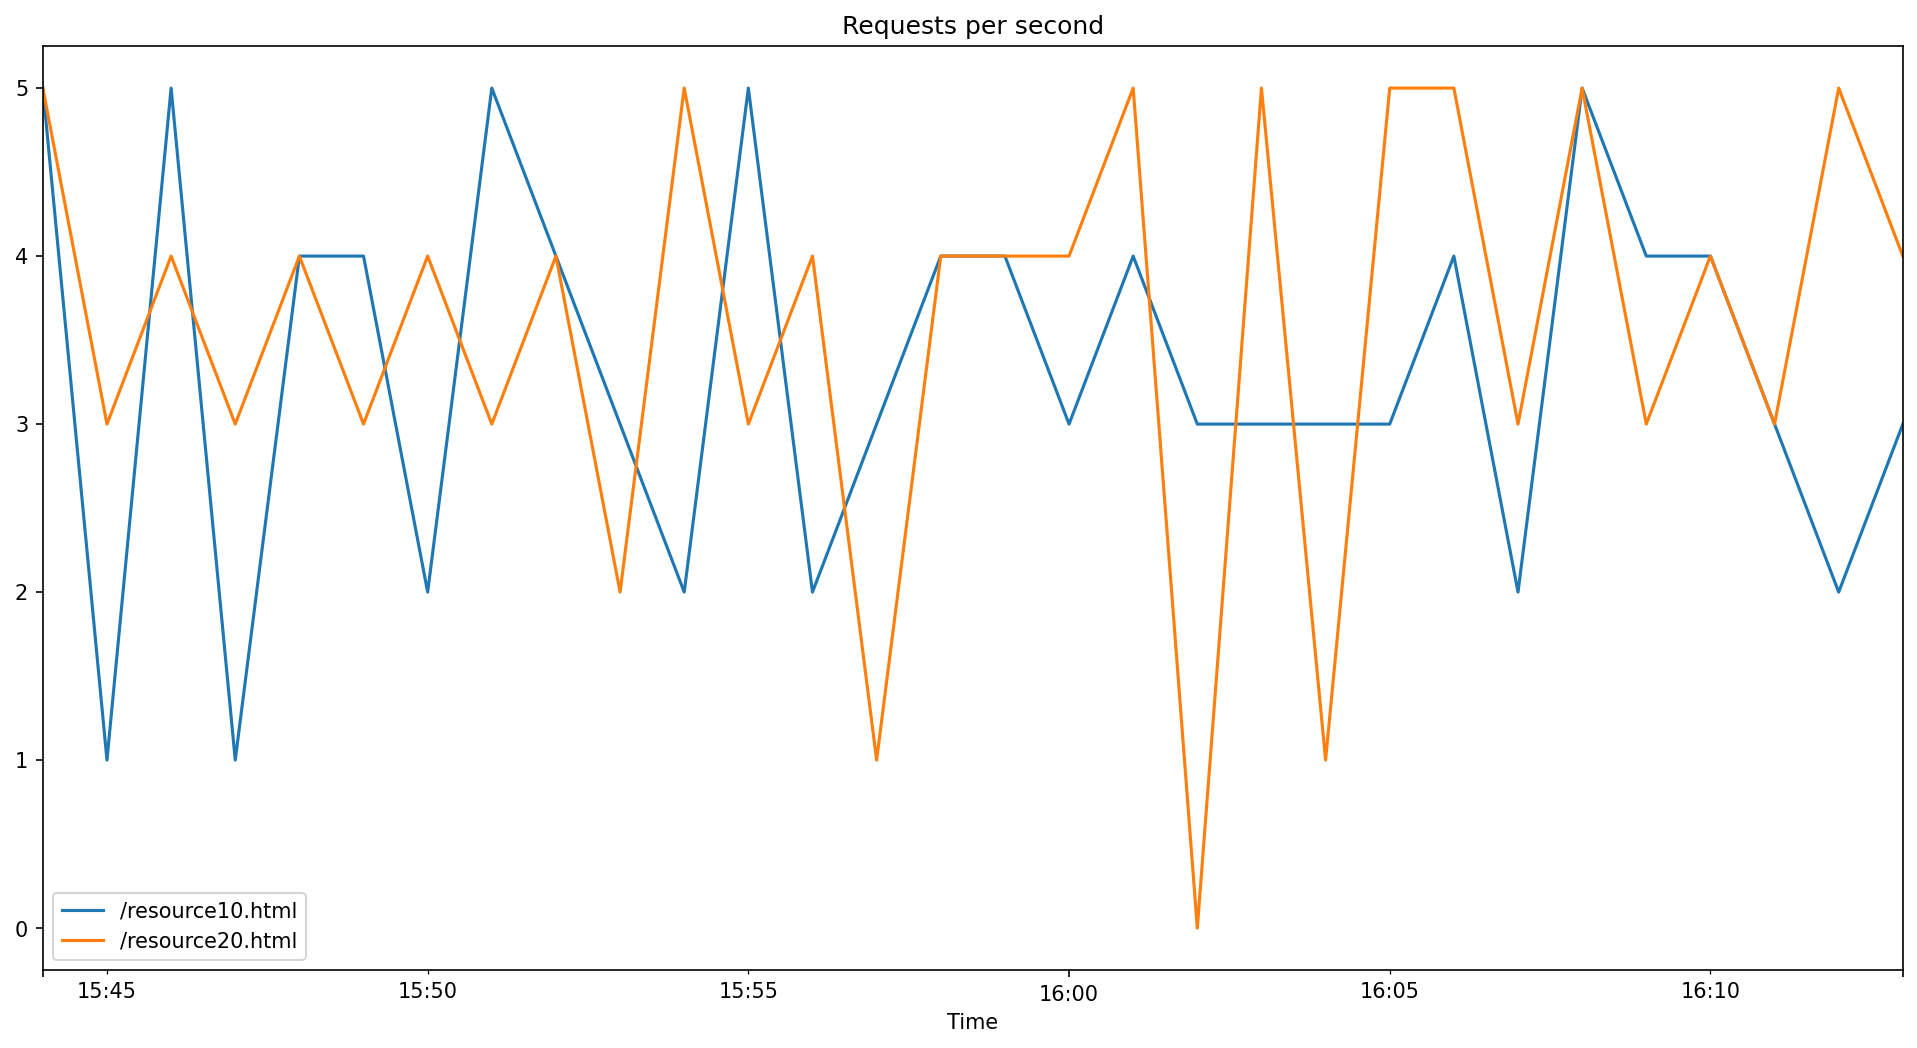

In [103]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for f in flows_ts_re:
    flows_ts_re[f]['count'].plot(label=f)
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
  
# adding legend to the curve
plt.legend()

In [122]:
# Link
# Which group has what signal
groups = normalized_df['cluster'].unique()
dtypes = list(flows_ts_ip.values())[0].dtypes.to_dict()
cols = list(list(flows_ts_ip.values())[0].columns)
sum_ts = {}
for group in groups:
    sum_ts[group] = pd.DataFrame(columns=cols)
    sum_ts[group].astype(dtypes)
    #sum_ts[group].set_index('frame.time')
for ip in normalized_df.index.tolist():
    s = flows_ts_ip[ip].add(sum_ts[normalized_df.loc[ip]['cluster']], fill_value=0)
    sum_ts[normalized_df.loc[ip]['cluster']] = s

In [ ]:
# normalize ts


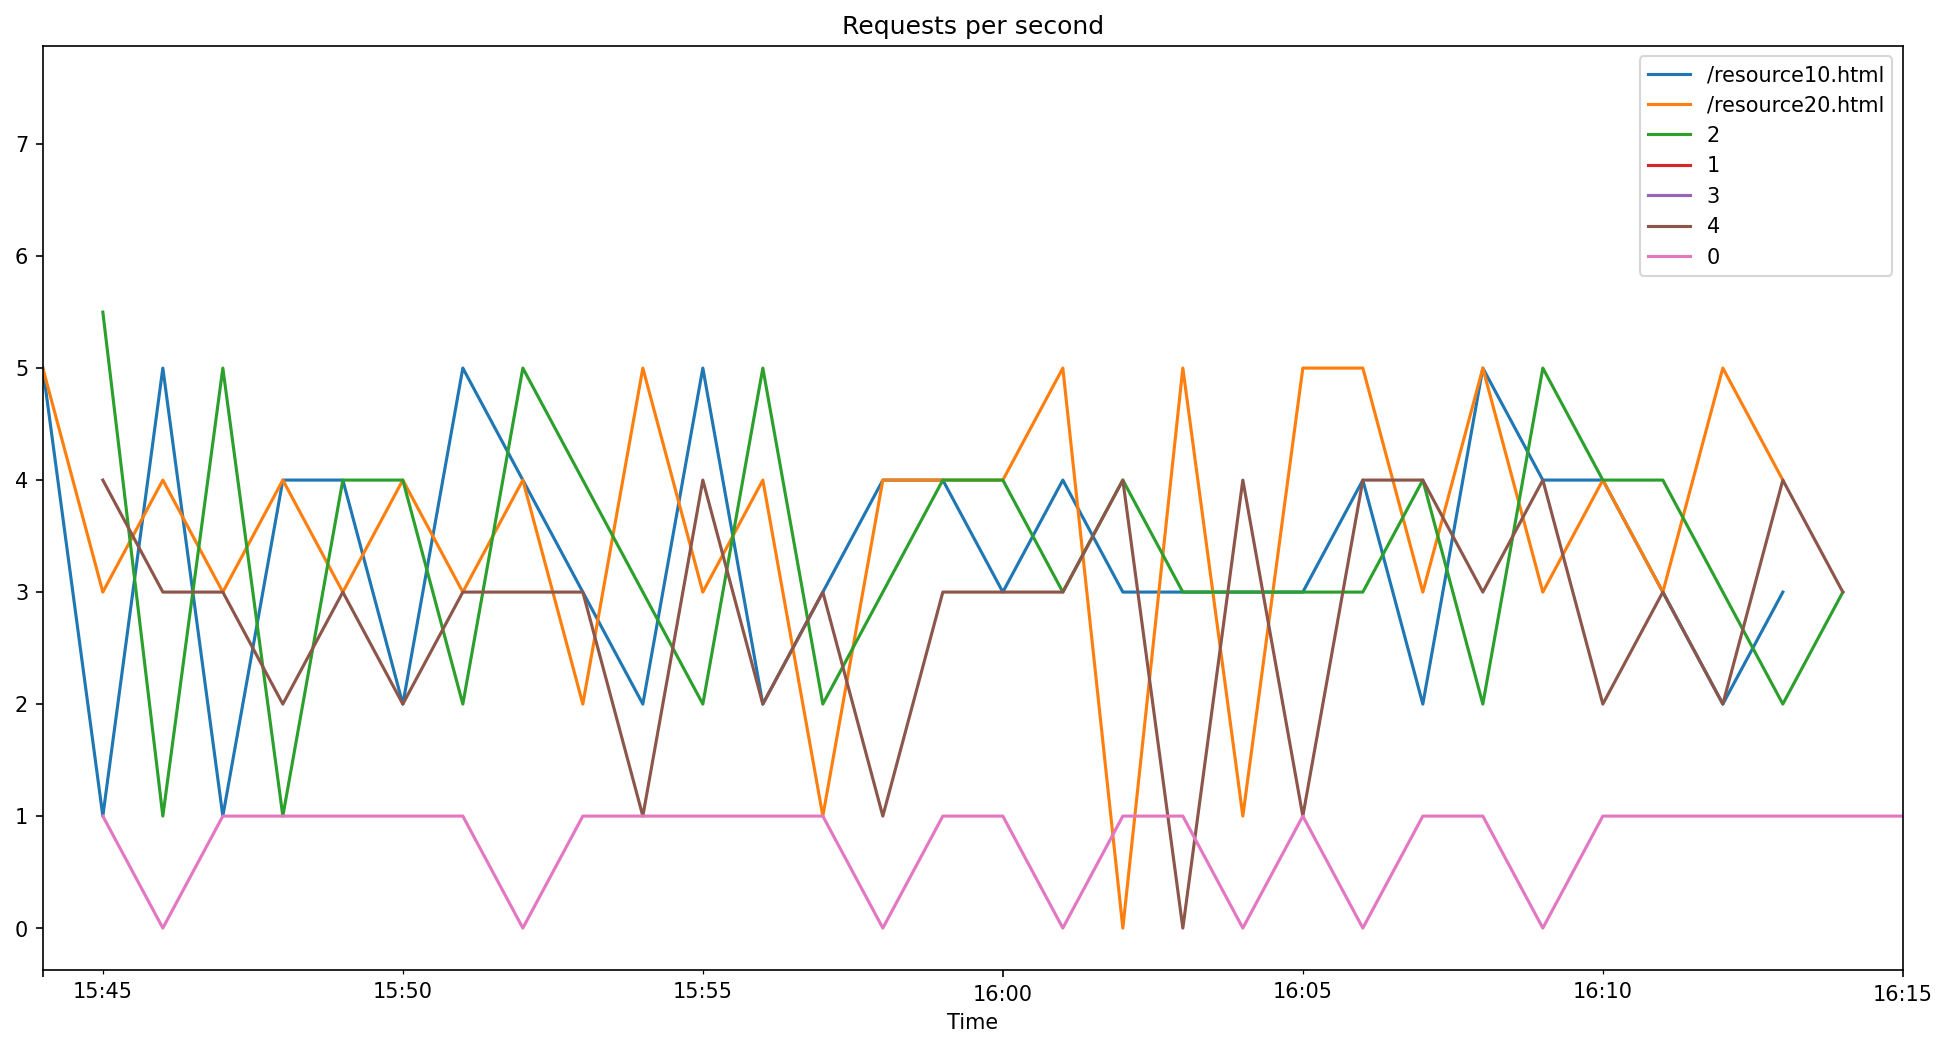

In [131]:
# resource_and_groups = sum_ts + flows_ts_re
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for f in flows_ts_re:
    flows_ts_re[f]['count'].plot(label=f)
for f in sum_ts:
    sum_ts[f]['count'].div(4).plot(label=f)
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
  
# adding legend to the curve
plt.legend()

In [133]:
# Find mathing groups for resources
!pip install pyts

from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

def compare_ts(ts1, ts2):
    dtw_classic, path_classic = dtw(ts1, ts2, dist='square',
                                method='classic', return_path=True)
    return dtw_classic

Defaulting to user installation because normal site-packages is not writeable


In [143]:
for f in flows_ts_re:
    print(f)
    best_group = -1
    best_sim = -1
    for c in sum_ts:
        if len(sum_ts[c]['count']) < 2:
            print("\tGroup " + str(c) + " is too short. Skipping")
            continue
        sim = compare_ts(flows_ts_re[f]['count'], sum_ts[c]['count'].div(4))
        print("\tGroup " + str(c) + "\t\tSim:" + str(sim))
        if best_group == -1 or best_sim > sim:
            best_group = c
            best_sim = sim
    print("\n\tBest match is group " + str(best_group) + " with sim " + str(best_sim) + "\n\n")

/resource10.html
	Group 2		Sim:0.5
	Group 1 is too short. Skipping
	Group 3 is too short. Skipping
	Group 4		Sim:5.830951894845301
	Group 0		Sim:14.45683229480096

	Best match is group 2 with sim 0.5


/resource20.html
	Group 2		Sim:6.264982043070834
	Group 1 is too short. Skipping
	Group 3 is too short. Skipping
	Group 4		Sim:4.898979485566356
	Group 0		Sim:16.0312195418814

	Best match is group 4 with sim 4.898979485566356


